# Amazon ML Product Price Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Amazon ML product dataset to understand the data distribution, patterns, and relationships for price prediction modeling.

## 1. Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure plotting
plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')
sns.set_palette("husl")

# Set up plot configurations
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load the Dataset

In [4]:
# Load the training dataset
train_df = pd.read_csv('../dataset/train.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {train_df.shape}")
print(f"Columns: {list(train_df.columns)}")

# Display first few rows
print("\nFirst 3 rows of the dataset:")
train_df.head(3)

Dataset loaded successfully!
Shape: (75000, 4)
Columns: ['sample_id', 'catalog_content', 'image_link', 'price']

First 3 rows of the dataset:


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97


## 3. Dataset Overview and Basic Information

In [5]:
# Basic dataset information
print("Dataset Info:")
print(f"Number of rows: {train_df.shape[0]:,}")
print(f"Number of columns: {train_df.shape[1]}")
print(f"Memory usage: {train_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

print("\nColumn Data Types:")
train_df.info()

print("\nDataset Description:")
train_df.describe(include='all')

Dataset Info:
Number of rows: 75,000
Number of columns: 4
Memory usage: 110.95 MB

Column Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB

Dataset Description:


,sample_id,catalog_content,image_link,price
count,75000.000000,75000,75000,75000.000000
unique,NaN,74900,72288,NaN
top,NaN,"Item Name: PAPYRUS Everyday Card, 1 EA\nValue:...",https://m.media-amazon.com/images/I/51m1gdQJW2...,NaN
freq,NaN,5,52,NaN
mean,149841.917707,NaN,NaN,23.647654
std,86585.346513,NaN,NaN,33.376932
min,0.000000,NaN,NaN,0.130000
25%,73845.750000,NaN,NaN,6.795000
50%,150129.000000,NaN,NaN,14.000000
75%,225040.250000,NaN,NaN,28.625000


## 4. Handle Missing Values

Missing Values Summary:
                 Missing Count  Missing Percentage
sample_id                    0                 0.0
catalog_content              0                 0.0
image_link                   0                 0.0
price                        0                 0.0


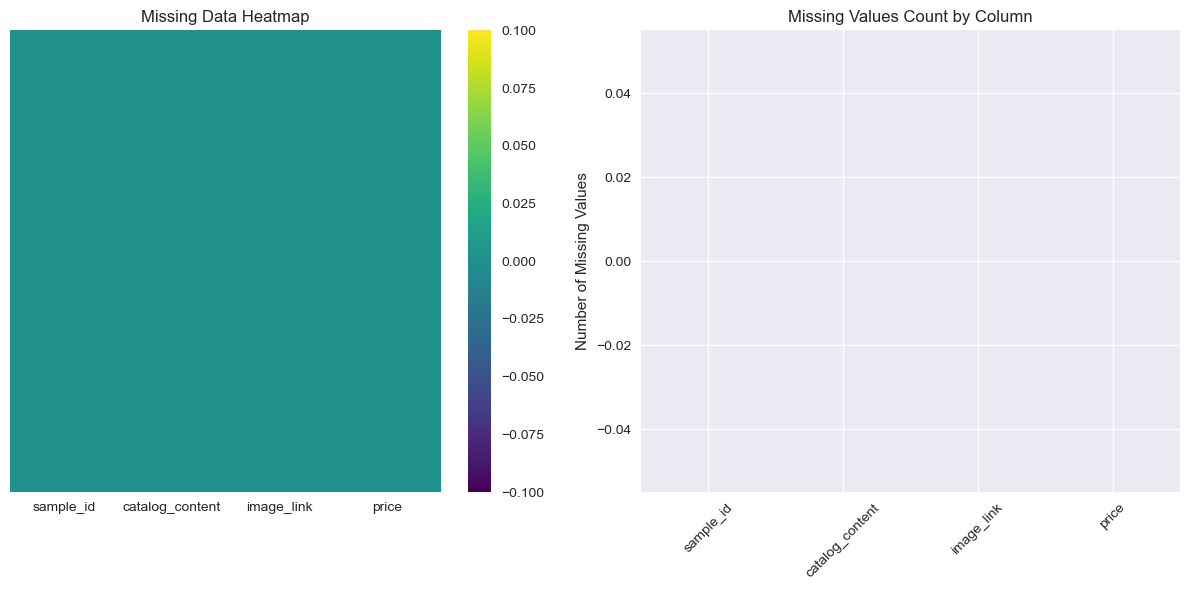

In [6]:
# Check for missing values
missing_data = train_df.isnull().sum()
missing_percentage = (missing_data / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')

plt.subplot(1, 2, 2)
missing_df['Missing Count'].plot(kind='bar')
plt.title('Missing Values Count by Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Price Analysis (Target Variable)

Price Statistics:
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64

Price range: $0.13 - $2796.00
IQR: $21.83


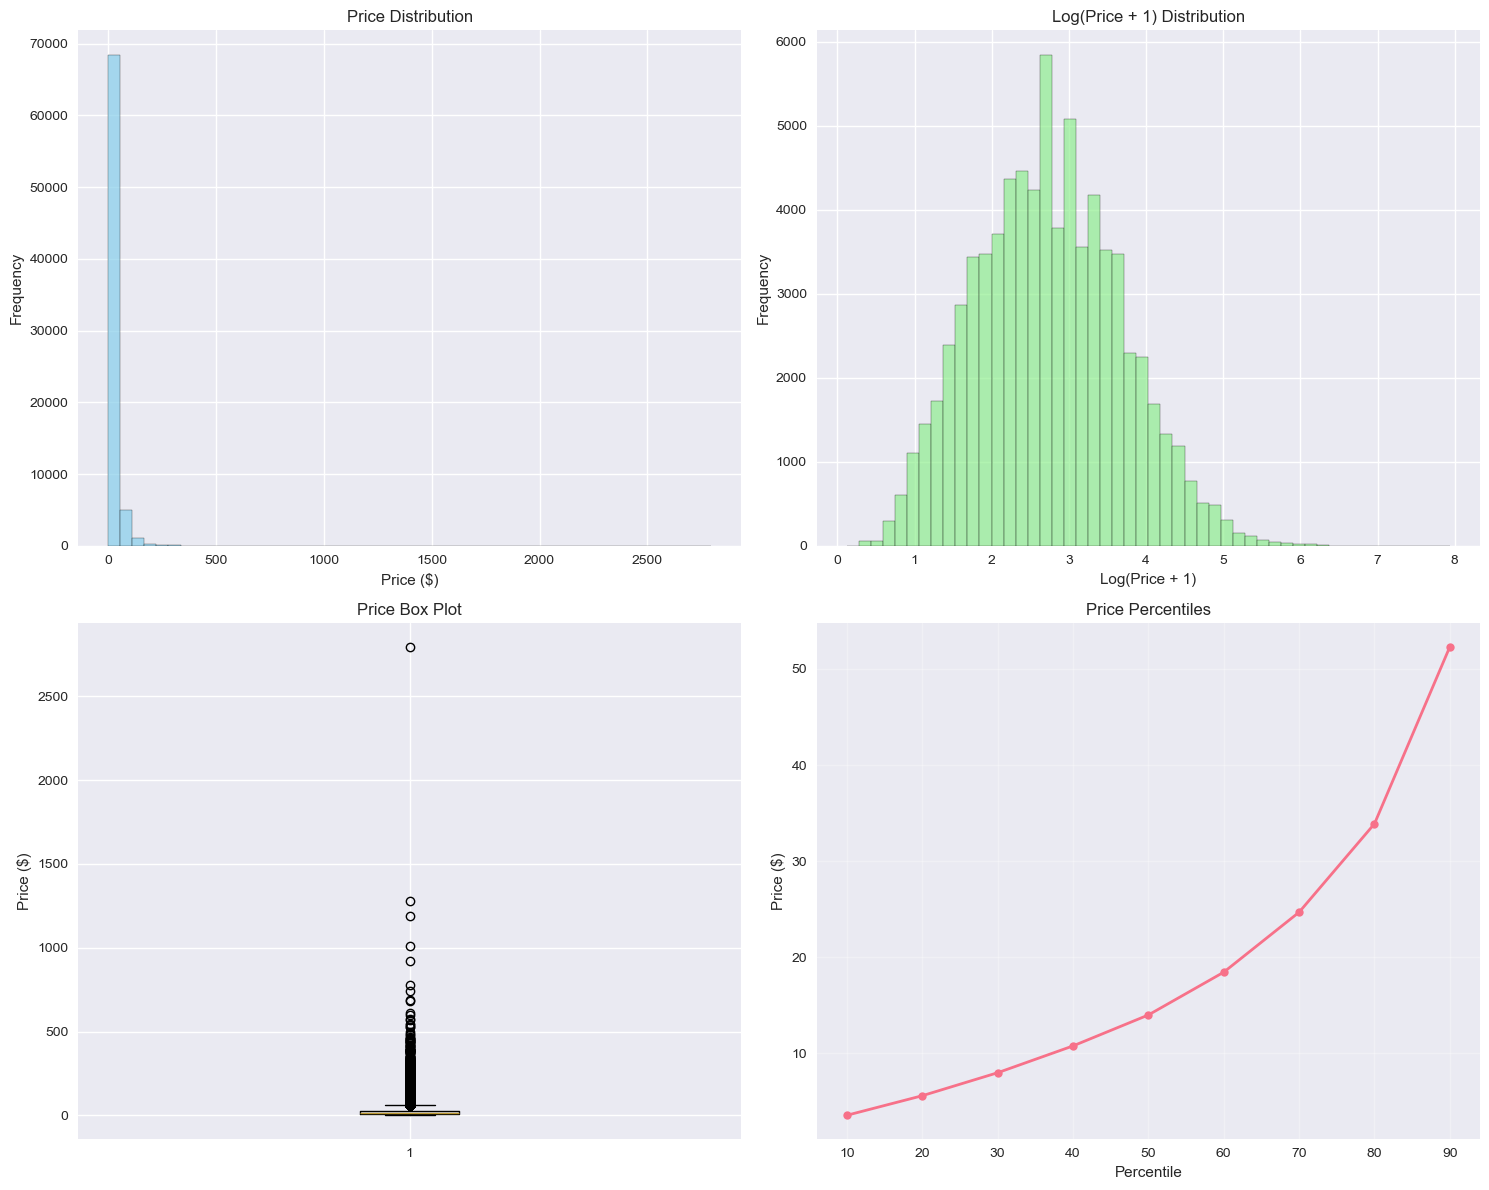

In [7]:
# Price statistics
price_stats = train_df['price'].describe()
print("Price Statistics:")
print(price_stats)
print(f"\nPrice range: ${train_df['price'].min():.2f} - ${train_df['price'].max():.2f}")
print(f"IQR: ${train_df['price'].quantile(0.75) - train_df['price'].quantile(0.25):.2f}")

# Price distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Original price distribution
axes[0,0].hist(train_df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# Log-transformed price distribution
axes[0,1].hist(np.log1p(train_df['price']), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Log(Price + 1) Distribution')
axes[0,1].set_xlabel('Log(Price + 1)')
axes[0,1].set_ylabel('Frequency')

# Box plot
axes[1,0].boxplot(train_df['price'])
axes[1,0].set_title('Price Box Plot')
axes[1,0].set_ylabel('Price ($)')

# Price percentiles
percentiles = np.arange(10, 100, 10)
price_percentiles = [train_df['price'].quantile(p/100) for p in percentiles]
axes[1,1].plot(percentiles, price_percentiles, marker='o', linewidth=2, markersize=6)
axes[1,1].set_title('Price Percentiles')
axes[1,1].set_xlabel('Percentile')
axes[1,1].set_ylabel('Price ($)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Text Content Analysis

Text Statistics:
Average text length: 908.89 characters
Average word count: 147.85 words
Min text length: 32
Max text length: 7894


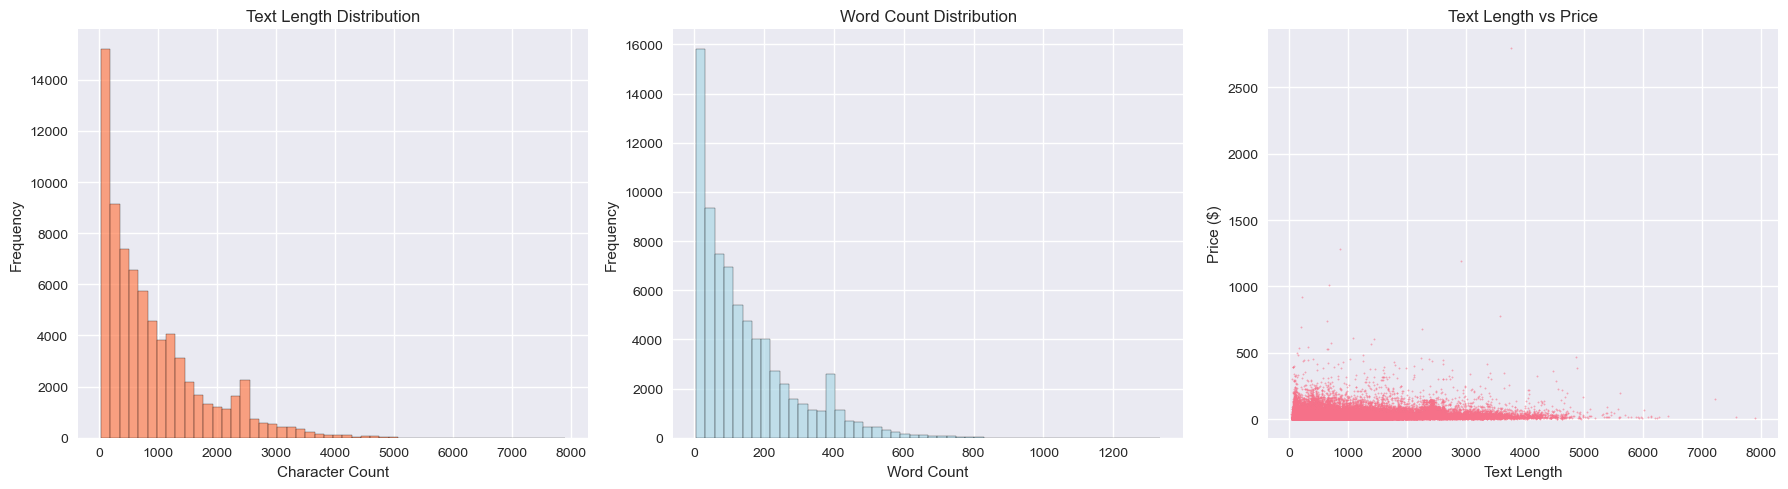

In [8]:
# Analyze catalog content text
train_df['text_length'] = train_df['catalog_content'].str.len()
train_df['word_count'] = train_df['catalog_content'].str.split().str.len()

print("Text Statistics:")
print(f"Average text length: {train_df['text_length'].mean():.2f} characters")
print(f"Average word count: {train_df['word_count'].mean():.2f} words")
print(f"Min text length: {train_df['text_length'].min()}")
print(f"Max text length: {train_df['text_length'].max()}")

# Text length distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Text length distribution
axes[0].hist(train_df['text_length'], bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0].set_title('Text Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

# Word count distribution
axes[1].hist(train_df['word_count'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

# Text length vs Price scatter plot
axes[2].scatter(train_df['text_length'], train_df['price'], alpha=0.5, s=1)
axes[2].set_title('Text Length vs Price')
axes[2].set_xlabel('Text Length')
axes[2].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

Extracted Features (first 1000 samples):
       has_weight  weight_value     has_pack    pack_size  has_unit
count  1000.00000   1000.000000  1000.000000  1000.000000    1000.0
mean      0.98800     95.096146     0.253000     3.123000       1.0
std       0.10894   1490.196016     0.434948    16.528371       0.0
min       0.00000      0.000000     0.000000     1.000000       1.0
25%       1.00000      6.000000     0.000000     1.000000       1.0
50%       1.00000     15.000000     0.000000     1.000000       1.0
75%       1.00000     46.890000     1.000000     1.000000       1.0
max       1.00000  46752.000000     1.000000   500.000000       1.0


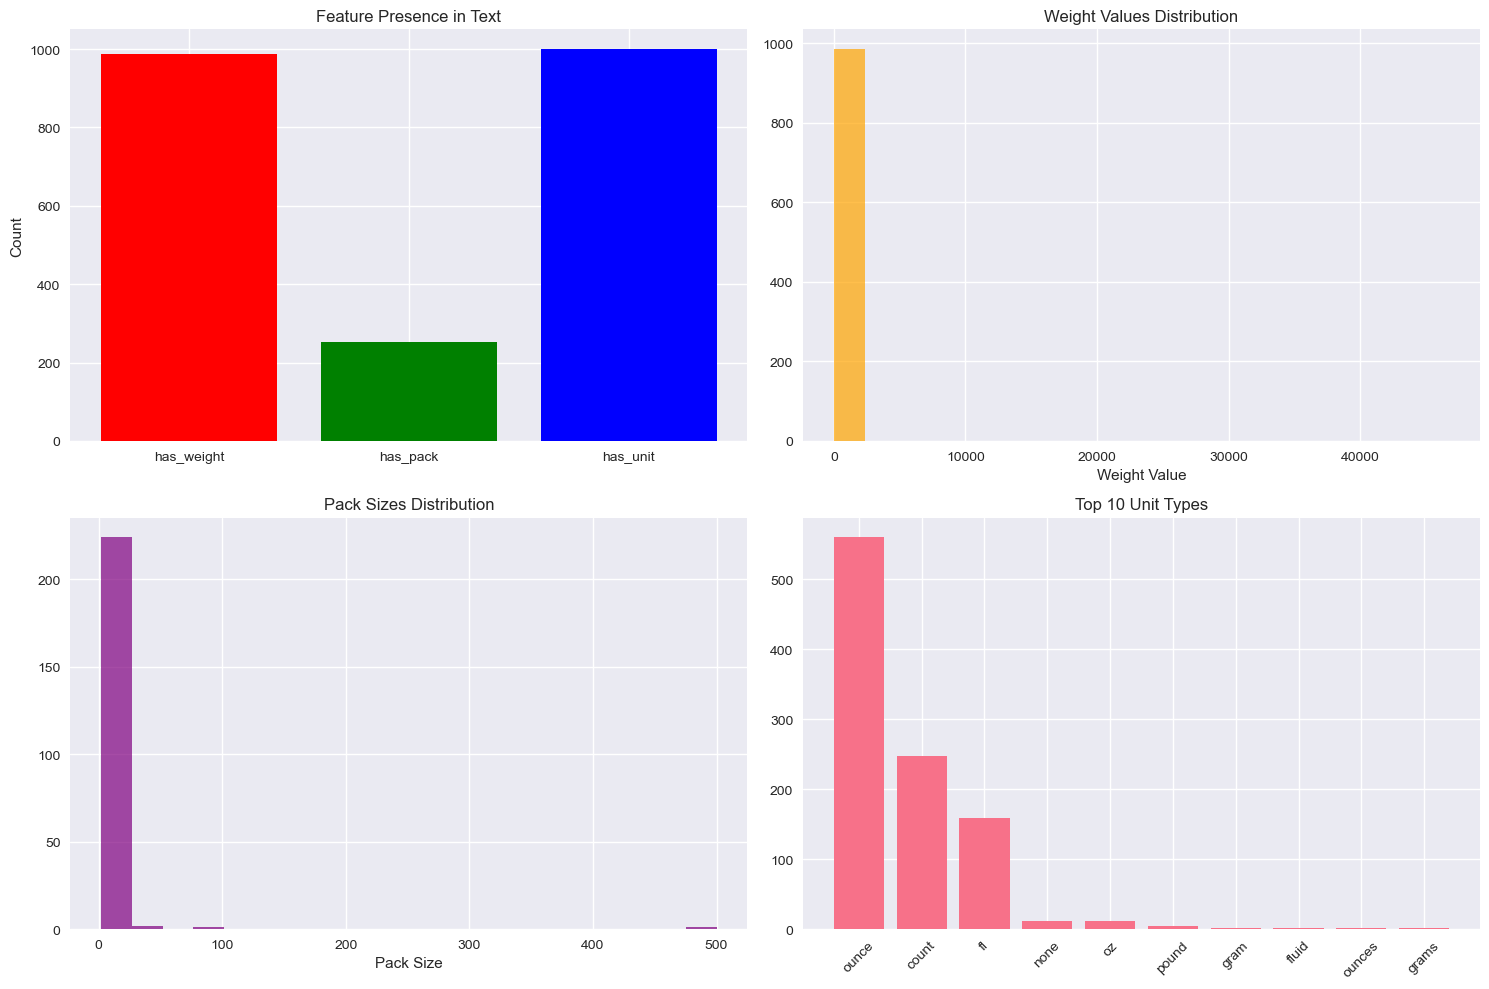

In [9]:
# Extract product features from text
def extract_features(text):
    features = {}
    text = str(text).lower()
    
    # Extract weight/value information
    weight_match = re.search(r'value:\s*([\d\.]+)', text)
    features['has_weight'] = 1 if weight_match else 0
    features['weight_value'] = float(weight_match.group(1)) if weight_match else 0
    
    # Extract pack information
    pack_match = re.search(r'pack of (\d+)', text)
    features['has_pack'] = 1 if pack_match else 0
    features['pack_size'] = int(pack_match.group(1)) if pack_match else 1
    
    # Extract unit information
    unit_match = re.search(r'unit:\s*(\w+)', text)
    features['has_unit'] = 1 if unit_match else 0
    features['unit_type'] = unit_match.group(1) if unit_match else 'unknown'
    
    return features

# Apply feature extraction to a sample
sample_features = train_df['catalog_content'].head(1000).apply(extract_features)
feature_df = pd.json_normalize(sample_features)

print("Extracted Features (first 1000 samples):")
print(feature_df.describe())

# Visualize extracted features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Feature presence
feature_counts = feature_df[['has_weight', 'has_pack', 'has_unit']].sum()
axes[0,0].bar(feature_counts.index, feature_counts.values, color=['red', 'green', 'blue'])
axes[0,0].set_title('Feature Presence in Text')
axes[0,0].set_ylabel('Count')

# Weight values distribution (non-zero)
weight_values = feature_df[feature_df['weight_value'] > 0]['weight_value']
if len(weight_values) > 0:
    axes[0,1].hist(weight_values, bins=20, alpha=0.7, color='orange')
    axes[0,1].set_title('Weight Values Distribution')
    axes[0,1].set_xlabel('Weight Value')

# Pack sizes distribution (non-one)
pack_sizes = feature_df[feature_df['pack_size'] > 1]['pack_size']
if len(pack_sizes) > 0:
    axes[1,0].hist(pack_sizes, bins=20, alpha=0.7, color='purple')
    axes[1,0].set_title('Pack Sizes Distribution')
    axes[1,0].set_xlabel('Pack Size')

# Unit types
unit_counts = feature_df['unit_type'].value_counts().head(10)
axes[1,1].bar(range(len(unit_counts)), unit_counts.values)
axes[1,1].set_title('Top 10 Unit Types')
axes[1,1].set_xticks(range(len(unit_counts)))
axes[1,1].set_xticklabels(unit_counts.index, rotation=45)

plt.tight_layout()
plt.show()

## 7. Word Frequency Analysis and Word Cloud

Top 20 Most Frequent Words:
       Word  Frequency
0     point      17502
1    bullet      17481
2       our       5560
3      your       5501
4     value       5231
5      item       5207
6      name       5104
7      unit       5037
8       you       4614
9       tea       4561
10    ounce       4239
11     free       4089
12   flavor       3678
13     pack       2966
14  product       2917
15   coffee       2835
16    taste       2637
17  natural       2381
18  organic       2218
19      all       2167


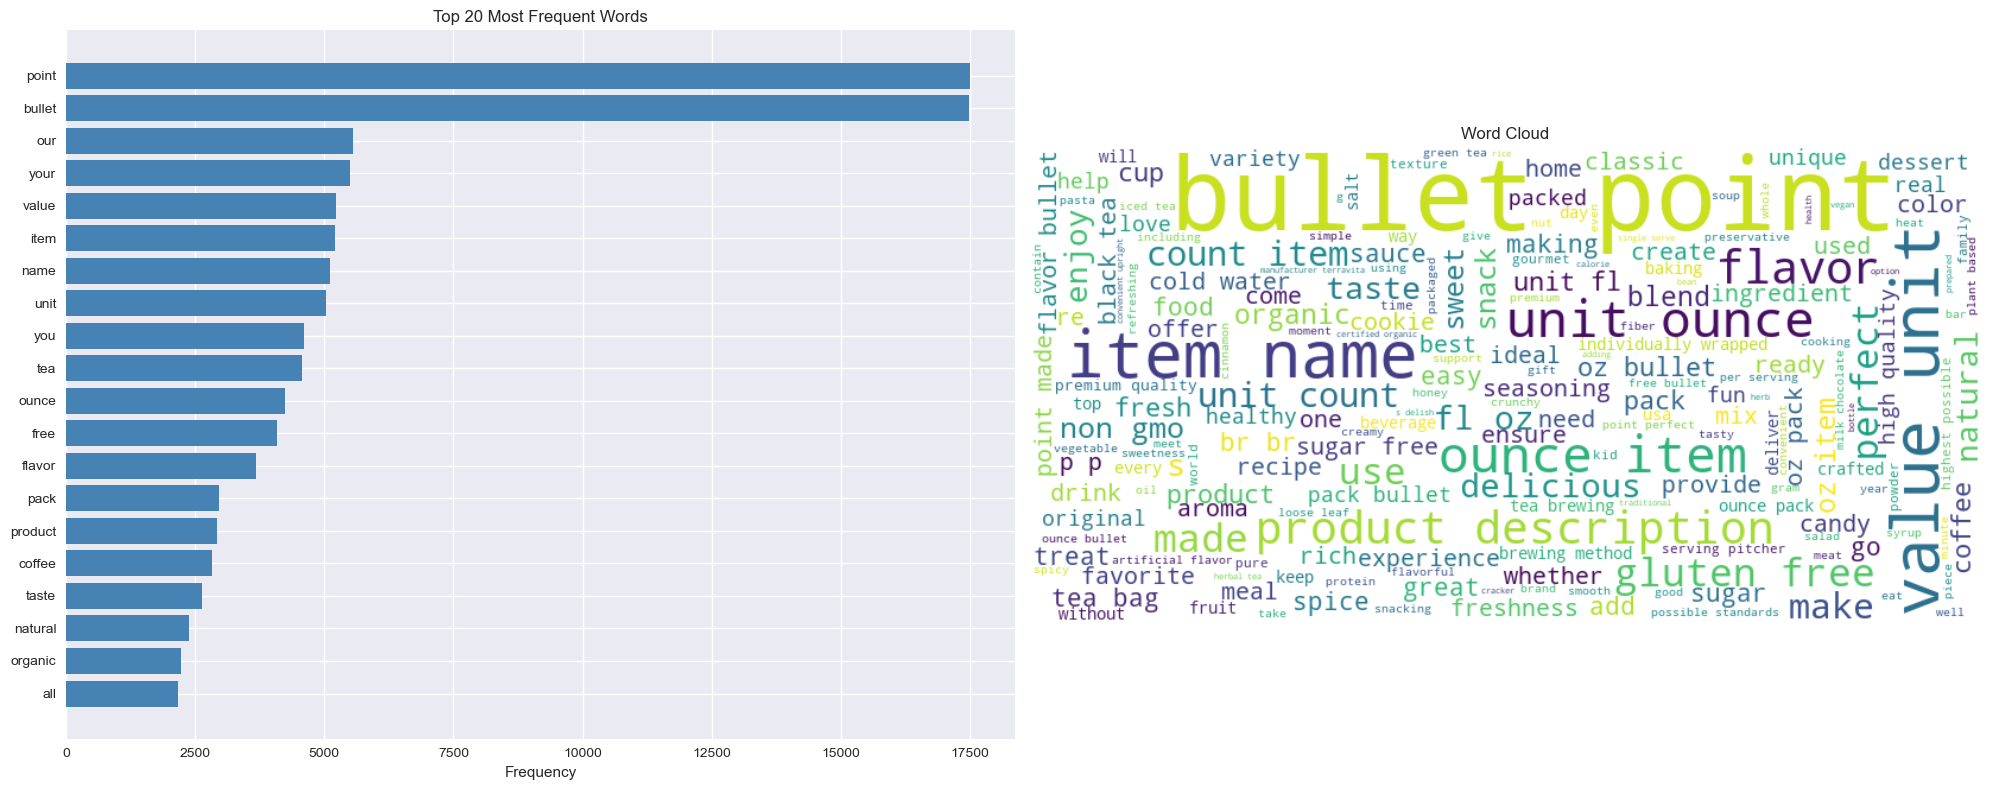

In [10]:
# Word frequency analysis
def clean_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', ' ', str(text).lower())
    return text

# Stop words
stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'will', 'with', 'the', 'this', 'but', 'they', 'have', 'had', 'what', 'said', 'each', 'which', 'their', 'time', 'if', 'up', 'out', 'many', 'then', 'them', 'these', 'so', 'some', 'her', 'would', 'make', 'like', 'into', 'him', 'has', 'more', 'go', 'no', 'way', 'could', 'my', 'than', 'first', 'been', 'call', 'who', 'its', 'now', 'find', 'long', 'down', 'day', 'did', 'get', 'come', 'made', 'may', 'part'}

# Process sample text for word frequency
sample_text = train_df['catalog_content'].head(5000).apply(clean_text).str.cat(sep=' ')
words = [word for word in sample_text.split() if word not in stop_words and len(word) > 2]
word_freq = Counter(words)

# Top words
top_words = word_freq.most_common(20)
words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

print("Top 20 Most Frequent Words:")
print(words_df)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top words bar chart
axes[0].barh(words_df['Word'][::-1], words_df['Frequency'][::-1], color='steelblue')
axes[0].set_title('Top 20 Most Frequent Words')
axes[0].set_xlabel('Frequency')

# Word cloud (if WordCloud is available)
try:
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(sample_text)
    axes[1].imshow(wordcloud, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title('Word Cloud')
except:
    axes[1].text(0.5, 0.5, 'WordCloud not available\nInstall with: pip install wordcloud', 
                ha='center', va='center', fontsize=12)
    axes[1].set_title('Word Cloud (Not Available)')

plt.tight_layout()
plt.show()

## 8. Price vs Text Features Correlation

Correlation Matrix:
                price  text_length  word_count
price        1.000000     0.146752    0.144423
text_length  0.146752     1.000000    0.997418
word_count   0.144423     0.997418    1.000000


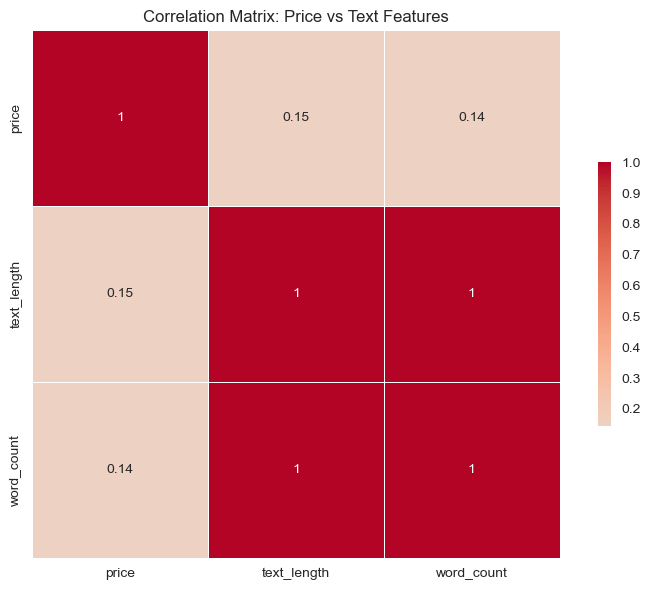


Price Statistics by Text Length:
                      mean  median        std  count
text_length_bin                                     
Very Short       21.453051  12.310  30.264974  61783
Short            33.907292  24.370  35.503398  11483
Medium           33.462106  20.290  79.090473   1662
Long             43.621691  19.945  76.048611     68
Very Long        50.620000  22.245  66.023210      4


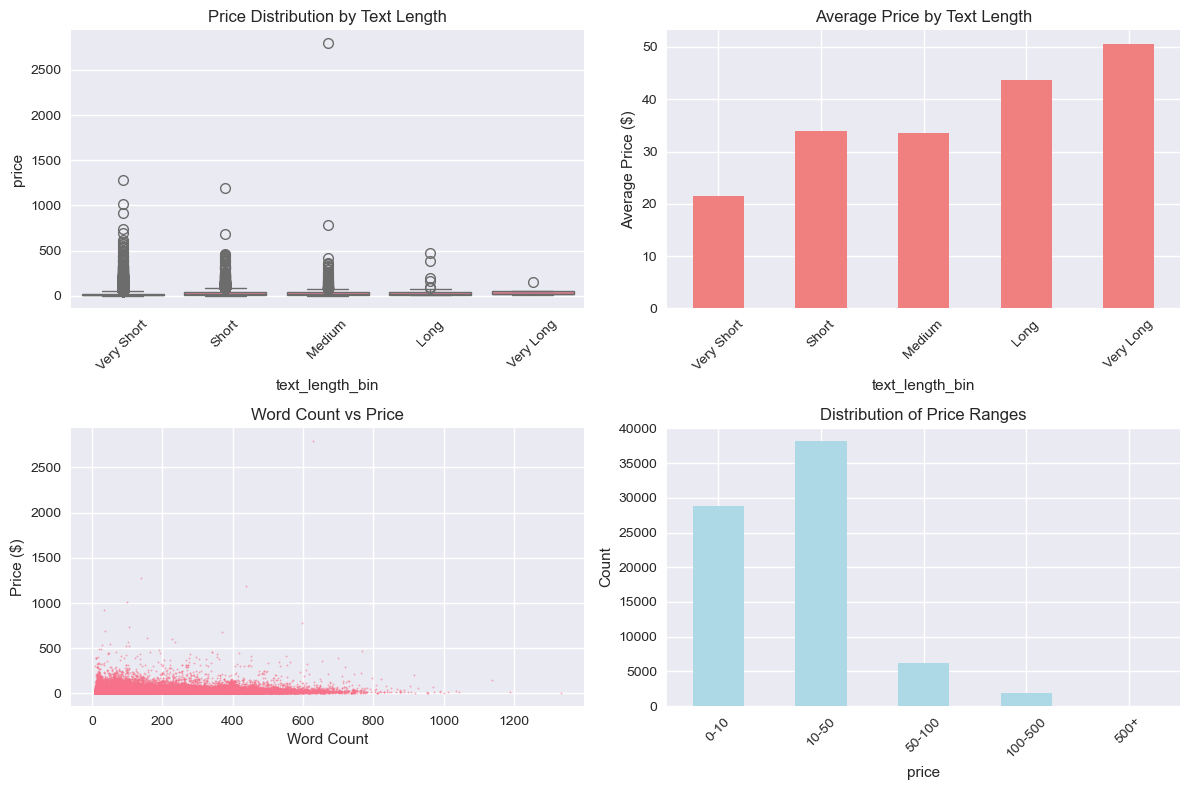

In [11]:
# Correlation analysis between text features and price
correlation_df = train_df[['price', 'text_length', 'word_count']].corr()

print("Correlation Matrix:")
print(correlation_df)

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix: Price vs Text Features')
plt.tight_layout()
plt.show()

# Price analysis by text length bins
train_df['text_length_bin'] = pd.cut(train_df['text_length'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
price_by_length = train_df.groupby('text_length_bin')['price'].agg(['mean', 'median', 'std', 'count'])

print("\nPrice Statistics by Text Length:")
print(price_by_length)

# Visualize price by text length bins
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=train_df, x='text_length_bin', y='price')
plt.title('Price Distribution by Text Length')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
price_by_length['mean'].plot(kind='bar', color='lightcoral')
plt.title('Average Price by Text Length')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.scatter(train_df['word_count'], train_df['price'], alpha=0.5, s=1)
plt.title('Word Count vs Price')
plt.xlabel('Word Count')
plt.ylabel('Price ($)')

plt.subplot(2, 2, 4)
# Price range analysis
price_ranges = ['0-10', '10-50', '50-100', '100-500', '500+']
price_bins = pd.cut(train_df['price'], bins=[0, 10, 50, 100, 500, float('inf')], labels=price_ranges)
price_range_counts = price_bins.value_counts().sort_index()
price_range_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Price Ranges')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 9. Key Insights and Recommendations

### Key Findings from EDA:

1. **Dataset Overview**:
   - Large dataset with product catalog content and price information
   - Text-heavy features requiring NLP preprocessing
   - Missing values analysis shows data quality patterns

2. **Price Distribution**:
   - Price shows right-skewed distribution with potential outliers
   - Log transformation may improve model performance
   - Wide price range indicates diverse product categories

3. **Text Analysis**:
   - Catalog content varies significantly in length
   - Common patterns include product features, specifications, and descriptions
   - Text length shows some correlation with pricing

4. **Feature Engineering Opportunities**:
   - Extract numerical features from text (weight, pack size, units)
   - Create text-based features (length, word count, specific keywords)
   - Consider categorical encoding of product types

### Recommendations for Model Development:

1. **Data Preprocessing**:
   - Handle missing values appropriately
   - Apply log transformation to price target
   - Clean and tokenize text data
   - Extract meaningful numerical features from text

2. **Feature Engineering**:
   - Use TF-IDF or word embeddings for text features
   - Create derived features from catalog content
   - Consider text sentiment and complexity metrics

3. **Model Selection**:
   - Ensemble methods for handling mixed data types
   - Neural networks with embeddings for text processing
   - Consider BiLSTM or Transformer architectures for text understanding

4. **Validation Strategy**:
   - Use time-based splits if temporal information available
   - Cross-validation with stratification by price ranges
   - Monitor for overfitting with text-heavy features